In [1]:
# librerías
from sklearn.ensemble import RandomForestRegressor
# The error metric, In this cas, we will use c-stat (aka ROC/AUC)
from sklearn.metrics import roc_auc_score
# an efficient data structure
import pandas as pd
# 
import matplotlib.pyplot as plt

# graphs
%matplotlib inline

# style
plt.style.use('seaborn')

#import the data
df = pd.read_csv("data/muestreo_con_indices_ENERO_2019.csv")
df.head()

,FECHA,x,y,MCARI_OSAVI,CI_green,NDRE,NDVI,MCARI_OSAVI_RE,MTCI,TCARI_OSAVI,...,N_TOTAL,NO3-NH4,M.O.,P2O5 mg/kg,P2O5 kg/ha,%Humedad,% ARENA,% ARCILLA,% LIMO,CLASE TEXTURAL
0,09/11/2017,672991,2834763,0.283920,1.015761,0.074783,0.206467,0.155900,0.691066,1.357306,...,3.26,39.062021,1.544575,26.692742,100.097782,12.401674,61.32,23.04,15.64,FRANCO ARCILLOSO ARENOSO
1,09/11/2017,673009,2834792,0.274314,0.985348,0.077153,0.203141,0.188865,0.753115,1.316350,...,3.31,39.062021,2.214359,49.234674,184.630027,11.348964,63.32,23.04,13.64,FRANCO ARCILLOSO ARENOSO
2,09/11/2017,673016,2834822,0.294672,1.093054,0.079282,0.228269,0.164282,0.662644,1.376631,...,3.78,13.586790,1.545501,98.296526,368.611973,13.609898,65.32,19.04,15.64,FRANCO ARENOSO
3,09/11/2017,673030,2834850,0.296775,1.191791,0.094331,0.268019,0.236521,0.704585,1.336456,...,3.48,22.078534,1.879976,46.582682,174.685057,13.875823,65.32,20.68,14.00,FRANCO ARCILLOSO ARENOSO
4,09/11/2017,673053,2834876,0.239374,1.052623,0.099655,0.230299,0.288989,0.957019,1.114491,...,3.49,20.380185,3.422192,122.827452,460.602945,12.392777,67.32,18.68,14.00,FRANCO ARENOSO


In [2]:
df.columns

Index(['FECHA', 'x', 'y', 'MCARI_OSAVI', 'CI_green', 'NDRE', 'NDVI',
       'MCARI_OSAVI_RE', 'MTCI', 'TCARI_OSAVI', 'CCCI_simpl', 'GNDVI', 'CCCI',
       'RVI', 'CIred_edge', 'TCARI_OSAVI_RE', 'Altura_PTA', 'SPAD', 'N_TOTAL',
       'NO3-NH4', 'M.O.', 'P2O5 mg/kg', 'P2O5 kg/ha', '%Humedad', '% ARENA',
       '% ARCILLA', '% LIMO', 'CLASE TEXTURAL'],
      dtype='object')

In [3]:
cols = ['FECHA', 'x', 'y', 'MCARI_OSAVI', 'CI_green', 'NDRE', 'NDVI',
       'MCARI_OSAVI_RE', 'MTCI', 'TCARI_OSAVI', 'CCCI_simpl', 'GNDVI', 'CCCI',
       'RVI', 'CIred_edge', 'TCARI_OSAVI_RE', 'Altura_PTA', 'SPAD',
       'NO3-NH4', 'M.O.', 'P2O5 mg/kg', 'P2O5 kg/ha', '%Humedad', '% ARENA',
       '% ARCILLA', '% LIMO', 'CLASE TEXTURAL','N_TOTAL']


In [4]:
df = df[cols]
df.head()

,FECHA,x,y,MCARI_OSAVI,CI_green,NDRE,NDVI,MCARI_OSAVI_RE,MTCI,TCARI_OSAVI,...,NO3-NH4,M.O.,P2O5 mg/kg,P2O5 kg/ha,%Humedad,% ARENA,% ARCILLA,% LIMO,CLASE TEXTURAL,N_TOTAL
0,09/11/2017,672991,2834763,0.283920,1.015761,0.074783,0.206467,0.155900,0.691066,1.357306,...,39.062021,1.544575,26.692742,100.097782,12.401674,61.32,23.04,15.64,FRANCO ARCILLOSO ARENOSO,3.26
1,09/11/2017,673009,2834792,0.274314,0.985348,0.077153,0.203141,0.188865,0.753115,1.316350,...,39.062021,2.214359,49.234674,184.630027,11.348964,63.32,23.04,13.64,FRANCO ARCILLOSO ARENOSO,3.31
2,09/11/2017,673016,2834822,0.294672,1.093054,0.079282,0.228269,0.164282,0.662644,1.376631,...,13.586790,1.545501,98.296526,368.611973,13.609898,65.32,19.04,15.64,FRANCO ARENOSO,3.78
3,09/11/2017,673030,2834850,0.296775,1.191791,0.094331,0.268019,0.236521,0.704585,1.336456,...,22.078534,1.879976,46.582682,174.685057,13.875823,65.32,20.68,14.00,FRANCO ARCILLOSO ARENOSO,3.48
4,09/11/2017,673053,2834876,0.239374,1.052623,0.099655,0.230299,0.288989,0.957019,1.114491,...,20.380185,3.422192,122.827452,460.602945,12.392777,67.32,18.68,14.00,FRANCO ARENOSO,3.49


In [5]:
X = df
y = X.pop("N_TOTAL")

In [6]:
# eliminar columnas
X.drop("P2O5 mg/kg", axis=1, inplace=True)
X.drop("P2O5 kg/ha", axis=1, inplace=True)
X.drop("Altura_PTA", axis=1, inplace=True)
X.drop("x", axis=1, inplace=True)
X.drop("y", axis=1, inplace=True)


In [7]:
X.count()

FECHA             103
MCARI_OSAVI       103
CI_green          103
NDRE              103
NDVI              103
MCARI_OSAVI_RE    103
MTCI              103
TCARI_OSAVI       103
CCCI_simpl        103
GNDVI             103
CCCI              103
RVI               103
CIred_edge        103
TCARI_OSAVI_RE    103
SPAD              103
NO3-NH4            85
M.O.               85
%Humedad           85
% ARENA           103
% ARCILLA         103
% LIMO            103
CLASE TEXTURAL    103
dtype: int64

In [8]:
X["NO3-NH4"].fillna(X["NO3-NH4"].mean(), inplace=True)
X["M.O."].fillna(X["M.O."].mean(), inplace=True)
#X["P2O5 mg/kg"].fillna(X["P2O5 mg/kg"].mean(), inplace=True)
#X["P2O5 kg/ha"].fillna(X["P2O5 kg/ha"].mean(), inplace=True)
X["%Humedad"].fillna(X["%Humedad"].mean(), inplace=True)

X.count()


FECHA             103
MCARI_OSAVI       103
CI_green          103
NDRE              103
NDVI              103
MCARI_OSAVI_RE    103
MTCI              103
TCARI_OSAVI       103
CCCI_simpl        103
GNDVI             103
CCCI              103
RVI               103
CIred_edge        103
TCARI_OSAVI_RE    103
SPAD              103
NO3-NH4           103
M.O.              103
%Humedad          103
% ARENA           103
% ARCILLA         103
% LIMO            103
CLASE TEXTURAL    103
dtype: int64

In [9]:
print(X["NO3-NH4"].max())
print(X["M.O."].max())
#print(X["P2O5 mg/kg"].mean())
#print(X["P2O5 kg/ha"].mean())
print(X["%Humedad"].mean())

66.23560125
3.6300179960000003
20.004128494341185


In [10]:
# get just the numeric variables by selecting only the variables that are not "object" datatypes
numeric_variables = list(X.dtypes[X.dtypes != "object"].index)
X[numeric_variables].head(10)

,MCARI_OSAVI,CI_green,NDRE,NDVI,MCARI_OSAVI_RE,MTCI,TCARI_OSAVI,CCCI_simpl,GNDVI,CCCI,RVI,CIred_edge,TCARI_OSAVI_RE,SPAD,NO3-NH4,M.O.,%Humedad,% ARENA,% ARCILLA,% LIMO
0,0.283920,1.015761,0.074783,0.206467,0.155900,0.691066,1.357306,0.155488,0.336669,0.362977,1.520898,0.161725,2.154459,37.1,39.062021,1.544575,12.401674,61.32,23.04,15.64
1,0.274314,0.985348,0.077153,0.203141,0.188865,0.753115,1.316350,0.175170,0.329649,0.382892,1.511626,0.167301,2.188258,33.1,39.062021,2.214359,11.348964,63.32,23.04,13.64
2,0.294672,1.093054,0.079282,0.228269,0.164282,0.662644,1.376631,0.192850,0.353286,0.348945,1.592500,0.172282,2.167296,38.6,13.586790,1.545501,13.609898,65.32,19.04,15.64
3,0.296775,1.191791,0.094331,0.268019,0.236521,0.704585,1.336456,0.317840,0.372851,0.355268,1.736582,0.208449,2.237800,37.6,22.078534,1.879976,13.875823,65.32,20.68,14.00
4,0.239374,1.052623,0.099655,0.230299,0.288989,0.957019,1.114491,0.362056,0.344411,0.435488,1.600575,0.221476,2.164132,37.1,20.380185,3.422192,12.392777,67.32,18.68,14.00
5,0.244962,0.979648,0.087967,0.206629,0.258192,0.903606,1.172938,0.264985,0.328648,0.426990,1.521703,0.192978,2.182215,37.1,22.078534,2.684608,12.908497,67.32,20.68,12.00
6,0.266601,0.946594,0.072872,0.190868,0.164325,0.741186,1.300863,0.139618,0.321137,0.382338,1.472472,0.157310,2.128348,35.6,20.380185,1.143012,13.653773,60.04,23.24,16.72
7,0.305626,1.257123,0.090900,0.270798,0.197606,0.644648,1.391197,0.289347,0.385795,0.335682,1.743250,0.200117,2.227669,36.7,27.173580,1.074272,15.018094,62.04,21.24,16.72
8,0.308447,1.207189,0.086401,0.273490,0.173436,0.591143,1.378921,0.251979,0.375673,0.316236,1.756289,0.189377,2.118948,33.8,22.078534,0.134311,13.238625,60.04,23.24,16.72
9,0.289723,1.100163,0.074131,0.226684,0.114325,0.598586,1.355004,0.150069,0.354695,0.327098,1.586881,0.160238,2.011704,37.7,64.537253,1.679892,13.097834,64.04,23.24,12.72


In [11]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
X["C_TEXTURAL"] = lb_make.fit_transform(X["CLASE TEXTURAL"])
X.head(10)

,FECHA,MCARI_OSAVI,CI_green,NDRE,NDVI,MCARI_OSAVI_RE,MTCI,TCARI_OSAVI,CCCI_simpl,GNDVI,...,TCARI_OSAVI_RE,SPAD,NO3-NH4,M.O.,%Humedad,% ARENA,% ARCILLA,% LIMO,CLASE TEXTURAL,C_TEXTURAL
0,09/11/2017,0.283920,1.015761,0.074783,0.206467,0.155900,0.691066,1.357306,0.155488,0.336669,...,2.154459,37.1,39.062021,1.544575,12.401674,61.32,23.04,15.64,FRANCO ARCILLOSO ARENOSO,0
1,09/11/2017,0.274314,0.985348,0.077153,0.203141,0.188865,0.753115,1.316350,0.175170,0.329649,...,2.188258,33.1,39.062021,2.214359,11.348964,63.32,23.04,13.64,FRANCO ARCILLOSO ARENOSO,0
2,09/11/2017,0.294672,1.093054,0.079282,0.228269,0.164282,0.662644,1.376631,0.192850,0.353286,...,2.167296,38.6,13.586790,1.545501,13.609898,65.32,19.04,15.64,FRANCO ARENOSO,1
3,09/11/2017,0.296775,1.191791,0.094331,0.268019,0.236521,0.704585,1.336456,0.317840,0.372851,...,2.237800,37.6,22.078534,1.879976,13.875823,65.32,20.68,14.00,FRANCO ARCILLOSO ARENOSO,0
4,09/11/2017,0.239374,1.052623,0.099655,0.230299,0.288989,0.957019,1.114491,0.362056,0.344411,...,2.164132,37.1,20.380185,3.422192,12.392777,67.32,18.68,14.00,FRANCO ARENOSO,1
5,09/11/2017,0.244962,0.979648,0.087967,0.206629,0.258192,0.903606,1.172938,0.264985,0.328648,...,2.182215,37.1,22.078534,2.684608,12.908497,67.32,20.68,12.00,FRANCO ARCILLOSO ARENOSO,0
6,09/11/2017,0.266601,0.946594,0.072872,0.190868,0.164325,0.741186,1.300863,0.139618,0.321137,...,2.128348,35.6,20.380185,1.143012,13.653773,60.04,23.24,16.72,FRANCO ARCILLOSO ARENOSO,0
7,09/11/2017,0.305626,1.257123,0.090900,0.270798,0.197606,0.644648,1.391197,0.289347,0.385795,...,2.227669,36.7,27.173580,1.074272,15.018094,62.04,21.24,16.72,FRANCO ARCILLOSO ARENOSO,0
8,09/11/2017,0.308447,1.207189,0.086401,0.273490,0.173436,0.591143,1.378921,0.251979,0.375673,...,2.118948,33.8,22.078534,0.134311,13.238625,60.04,23.24,16.72,FRANCO ARCILLOSO ARENOSO,0
9,09/11/2017,0.289723,1.100163,0.074131,0.226684,0.114325,0.598586,1.355004,0.150069,0.354695,...,2.011704,37.7,64.537253,1.679892,13.097834,64.04,23.24,12.72,FRANCO ARCILLOSO ARENOSO,0


In [12]:
X.head()

,FECHA,MCARI_OSAVI,CI_green,NDRE,NDVI,MCARI_OSAVI_RE,MTCI,TCARI_OSAVI,CCCI_simpl,GNDVI,...,TCARI_OSAVI_RE,SPAD,NO3-NH4,M.O.,%Humedad,% ARENA,% ARCILLA,% LIMO,CLASE TEXTURAL,C_TEXTURAL
0,09/11/2017,0.283920,1.015761,0.074783,0.206467,0.155900,0.691066,1.357306,0.155488,0.336669,...,2.154459,37.1,39.062021,1.544575,12.401674,61.32,23.04,15.64,FRANCO ARCILLOSO ARENOSO,0
1,09/11/2017,0.274314,0.985348,0.077153,0.203141,0.188865,0.753115,1.316350,0.175170,0.329649,...,2.188258,33.1,39.062021,2.214359,11.348964,63.32,23.04,13.64,FRANCO ARCILLOSO ARENOSO,0
2,09/11/2017,0.294672,1.093054,0.079282,0.228269,0.164282,0.662644,1.376631,0.192850,0.353286,...,2.167296,38.6,13.586790,1.545501,13.609898,65.32,19.04,15.64,FRANCO ARENOSO,1
3,09/11/2017,0.296775,1.191791,0.094331,0.268019,0.236521,0.704585,1.336456,0.317840,0.372851,...,2.237800,37.6,22.078534,1.879976,13.875823,65.32,20.68,14.00,FRANCO ARCILLOSO ARENOSO,0
4,09/11/2017,0.239374,1.052623,0.099655,0.230299,0.288989,0.957019,1.114491,0.362056,0.344411,...,2.164132,37.1,20.380185,3.422192,12.392777,67.32,18.68,14.00,FRANCO ARENOSO,1


In [13]:
X.drop("CLASE TEXTURAL", axis=1, inplace=True)
#X.drop("P2O5 mg/kg", axis=1, inplace=True)
#X.drop("P2O5 kg/ha", axis=1, inplace=True)
X.head()

,FECHA,MCARI_OSAVI,CI_green,NDRE,NDVI,MCARI_OSAVI_RE,MTCI,TCARI_OSAVI,CCCI_simpl,GNDVI,...,CIred_edge,TCARI_OSAVI_RE,SPAD,NO3-NH4,M.O.,%Humedad,% ARENA,% ARCILLA,% LIMO,C_TEXTURAL
0,09/11/2017,0.283920,1.015761,0.074783,0.206467,0.155900,0.691066,1.357306,0.155488,0.336669,...,0.161725,2.154459,37.1,39.062021,1.544575,12.401674,61.32,23.04,15.64,0
1,09/11/2017,0.274314,0.985348,0.077153,0.203141,0.188865,0.753115,1.316350,0.175170,0.329649,...,0.167301,2.188258,33.1,39.062021,2.214359,11.348964,63.32,23.04,13.64,0
2,09/11/2017,0.294672,1.093054,0.079282,0.228269,0.164282,0.662644,1.376631,0.192850,0.353286,...,0.172282,2.167296,38.6,13.586790,1.545501,13.609898,65.32,19.04,15.64,1
3,09/11/2017,0.296775,1.191791,0.094331,0.268019,0.236521,0.704585,1.336456,0.317840,0.372851,...,0.208449,2.237800,37.6,22.078534,1.879976,13.875823,65.32,20.68,14.00,0
4,09/11/2017,0.239374,1.052623,0.099655,0.230299,0.288989,0.957019,1.114491,0.362056,0.344411,...,0.221476,2.164132,37.1,20.380185,3.422192,12.392777,67.32,18.68,14.00,1


In [14]:
# letś build our first model. I always have oob_score=True. It is a good idea to increase n_estimators
#  to a number higher than the defaul. in this case the oob_predictions will be based on a forest of 33 trees.
# I set random_state=42 so that you all could replicate the model exactly
model = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=0)

# I only use numeric_variables because I have yet to dummy out the categorical variables
model.fit(X[numeric_variables], y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=True, random_state=0, verbose=0, warm_start=False)

In [15]:
# for regression, the oob_score attribute gives the R^2 based on the obb predictions. We want to use c-stat,
# for awareness. By the way, attibutes in skelearn that have a trailing underscore are only available after
# the model has been run
model.oob_score_

0.639318753851779

In [16]:
# model score
model.score(X[numeric_variables],y)
# if the y is a binary dtype
# y_oob = model.oob_prediction_
# print(c-stat: ", roc_auc_score(y, y_oob))

0.952622495862859

In [17]:
# drop the variables x and y
X.drop(["FECHA"], axis=1, inplace=True)

In [18]:
model = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=0)
model.fit(X,y)

print(model.score(X,y))

# binary values in y
#print("c-stat: ", roc_auc_score(y, model.oob_prediction_))

0.9519067453497309


In [19]:
# variable importance
model.feature_importances_

array([0.45513832, 0.01490107, 0.00468677, 0.05150696, 0.02338143,
       0.01249858, 0.03480459, 0.01452566, 0.01454524, 0.01944928,
       0.03959259, 0.00603722, 0.09705947, 0.0195041 , 0.05161746,
       0.05796802, 0.04141355, 0.01331063, 0.01358191, 0.01343438,
       0.00104278])

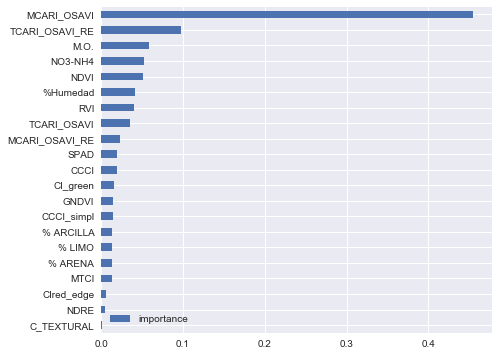

In [20]:
# simple version that shows all of the variables
feature_importances = pd.DataFrame({"importance": model.feature_importances_}, index=X.columns)
feature_importances.sort_values(by=["importance"], inplace=True)
feature_importances.plot(kind="barh", figsize=(7,6))

30 trees
0.9387646904350487

50 trees
0.9488114144091547

100 trees
0.9519067453497309

200 trees
0.9533425753685786

500 trees
0.9537787787363445

1000 trees
0.9539453410818384

2000 trees
0.9530290357056511



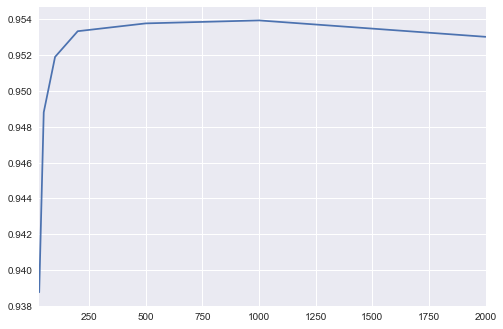

In [21]:
results = []
n_estimator_options = [30, 50, 100, 200, 500, 1000, 2000]

for trees in n_estimator_options:
    model = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=0)
    model.fit(X, y)
    print (trees, "trees")
    # roc = roc_auc_score(y, model.oob_prediction_)
    # print ("C-stat: ", roc)
    print (model.score(X,y))
    results.append(model.score(X,y))
    print ("")
    
pd.Series(results, n_estimator_options).plot();

auto option
0.9539453410818383

None option
0.9539453410818383

sqrt option
0.9523963256544045

log2 option
0.9523963256544045

0.9 option
0.9536912338287813

0.2 option
0.9523963256544045



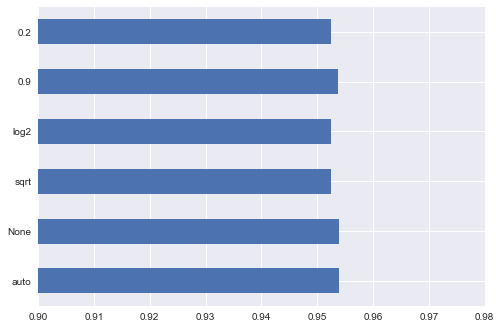

In [22]:
results = []
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2]

for max_features in max_features_options:
    model = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=0, max_features=max_features)
    model.fit(X, y)
    print (max_features, "option")
    # roc = roc_auc_score(y, model.oob_prediction_)
    # print ("C-stat: ", roc)
    print (model.score(X,y))
    results.append(model.score(X,y))
    print ("")
    
pd.Series(results, max_features_options).plot(kind="barh", xlim=(.9,.98));


1 min samples
0.9539453410818383

2 min samples
0.9283532821878838

3 min samples
0.8973089299565006

4 min samples
0.8675134913981962

5 min samples
0.8407601479097973

6 min samples
0.8152362972832342

7 min samples
0.789225425919287

8 min samples
0.7679113656099602

9 min samples
0.7493600978720718

10 min samples
0.7326617725117661



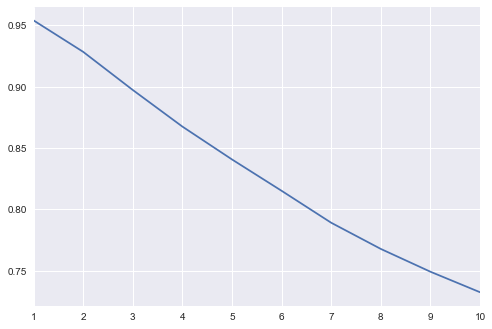

In [23]:
results = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for min_samples in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators=1000, 
                                  oob_score=True, 
                                  n_jobs=-1, 
                                  random_state=0, 
                                  max_features="auto", 
                                  min_samples_leaf=min_samples)
    model.fit(X, y)
    print (min_samples, "min samples")
    # roc = roc_auc_score(y, model.oob_prediction_)
    # print ("C-stat: ", roc)
    print (model.score(X,y))
    results.append(model.score(X,y))
    print ("")
    
pd.Series(results, min_samples_leaf_options).plot();

In [24]:
model = RandomForestRegressor(n_estimators=1000, 
                              oob_score=True, 
                              n_jobs=-1, 
                              random_state=0, 
                              max_features="auto", 
                              min_samples_leaf=1)
model.fit(X, y)

print (model.score(X,y))
# roc = roc_auc_score(y, model.oob_prediction_)
# print ("C-stat: ", roc)

0.9539453410818383


In [25]:
# Make train and test datasets
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print ("R^2:", model.score(X_test, y_test).round(2))

R^2: 0.38


In [27]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
print ("R^2:", model.score(X_test, y_test).round(2))

R^2: 0.31


In [28]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
print ("R^2:", model.score(X_test, y_test).round(2))

R^2: 0.56


In [29]:
data = pd.DataFrame({"N_TOTAL": y, "Pred": model.predict(X)})

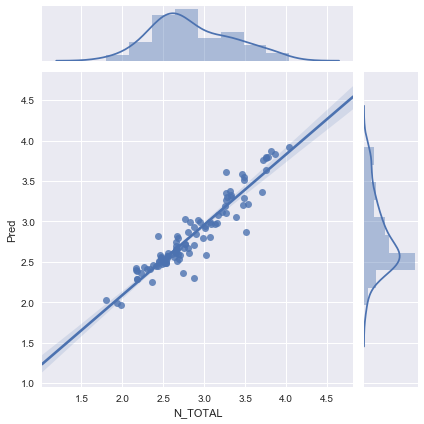

In [30]:
import seaborn as sns
sns.jointplot("N_TOTAL", "Pred", data=data, kind="reg")

In [31]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
scores  

array([-2.27887117, -0.15075145,  0.19859795, -1.06446212, -1.16429359])

In [32]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: -0.89 (+/- 1.74)


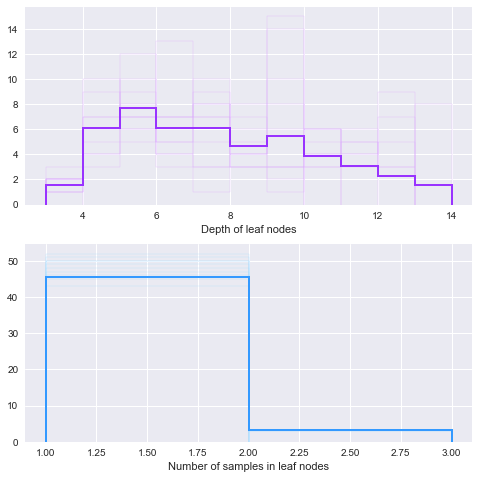

In [33]:
from sklearn.tree import _tree, export_graphviz
import matplotlib.pyplot as plt
def leaf_depths(tree, node_id = 0):
    
    left_child = tree.children_left[node_id]
    right_child = tree.children_right[node_id]

    if left_child == _tree.TREE_LEAF:
        
        depths = np.array([0])

    else:
        
        left_depths = leaf_depths(tree, left_child) + 1
        right_depths = leaf_depths(tree, right_child) + 1

        depths = np.append(left_depths, right_depths)

    return depths

def leaf_samples(tree, node_id = 0):
    
    left_child = tree.children_left[node_id]
    right_child = tree.children_right[node_id]

    if left_child == _tree.TREE_LEAF:
        
        samples = np.array([tree.n_node_samples[node_id]])

    else:
        
        left_samples = leaf_samples(tree, left_child)
        right_samples = leaf_samples(tree, right_child)

        samples = np.append(left_samples, right_samples)

    return samples

def draw_tree(ensemble, tree_id=0):

    plt.figure(figsize=(8,8))
    plt.subplot(211)

    tree = ensemble.estimators_[tree_id].tree_

    depths = leaf_depths(tree)
    plt.hist(depths, histtype='step', color='#9933ff', 
             bins=range(min(depths), max(depths)+1))

    plt.xlabel("Depth of leaf nodes (tree %s)" % tree_id)
    
    plt.subplot(212)
    
    samples = leaf_samples(tree)
    plt.hist(samples, histtype='step', color='#3399ff', 
             bins=range(min(samples), max(samples)+1))
    
    plt.xlabel("Number of samples in leaf nodes (tree %s)" % tree_id)
    
    plt.show()

def draw_ensemble(ensemble):

    plt.figure(figsize=(8,8))
    plt.subplot(211)

    depths_all = np.array([], dtype=int)

    for x in ensemble.estimators_:
        tree = x.tree_
        depths = leaf_depths(tree)
        depths_all = np.append(depths_all, depths)
        plt.hist(depths, histtype='step', color='#ddaaff', 
                 bins=range(min(depths), max(depths)+1))

    plt.hist(depths_all, histtype='step', color='#9933ff', 
             bins=range(min(depths_all), max(depths_all)+1), 
             weights=np.ones(len(depths_all))/len(ensemble.estimators_), 
             linewidth=2)
    plt.xlabel("Depth of leaf nodes")
    
    samples_all = np.array([], dtype=int)
    
    plt.subplot(212)
    
    for x in ensemble.estimators_:
        tree = x.tree_
        samples = leaf_samples(tree)
        samples_all = np.append(samples_all, samples)
        plt.hist(samples, histtype='step', color='#aaddff', 
                 bins=range(min(samples), max(samples)+1))
    
    plt.hist(samples_all, histtype='step', color='#3399ff', 
             bins=range(min(samples_all), max(samples_all)+1), 
             weights=np.ones(len(samples_all))/len(ensemble.estimators_), 
             linewidth=2)
    plt.xlabel("Number of samples in leaf nodes")
    
    plt.show()

draw_ensemble(model)

In [34]:
# model tree
model.estimators_[0]

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1608637542, splitter='best')

In [35]:
from sklearn import tree
from sklearn.tree import export_graphviz
import os

export_graphviz(model.estimators_[0],
                feature_names=X.columns,
                filled=True,
                rounded=True)

os.system('dot -Tpng tree.dot -o tree_sin_fosforo_altura_x_y.png')

/Users/jorgemauricio/anaconda/lib/python3.6/site-packages/sklearn/tree/export.py:399: DeprecationWarning: out_file can be set to None starting from 0.18. This will be the default in 0.20.
  DeprecationWarning)


0

In [36]:
X[numeric_variables].head()

,MCARI_OSAVI,CI_green,NDRE,NDVI,MCARI_OSAVI_RE,MTCI,TCARI_OSAVI,CCCI_simpl,GNDVI,CCCI,RVI,CIred_edge,TCARI_OSAVI_RE,SPAD,NO3-NH4,M.O.,%Humedad,% ARENA,% ARCILLA,% LIMO
0,0.283920,1.015761,0.074783,0.206467,0.155900,0.691066,1.357306,0.155488,0.336669,0.362977,1.520898,0.161725,2.154459,37.1,39.062021,1.544575,12.401674,61.32,23.04,15.64
1,0.274314,0.985348,0.077153,0.203141,0.188865,0.753115,1.316350,0.175170,0.329649,0.382892,1.511626,0.167301,2.188258,33.1,39.062021,2.214359,11.348964,63.32,23.04,13.64
2,0.294672,1.093054,0.079282,0.228269,0.164282,0.662644,1.376631,0.192850,0.353286,0.348945,1.592500,0.172282,2.167296,38.6,13.586790,1.545501,13.609898,65.32,19.04,15.64
3,0.296775,1.191791,0.094331,0.268019,0.236521,0.704585,1.336456,0.317840,0.372851,0.355268,1.736582,0.208449,2.237800,37.6,22.078534,1.879976,13.875823,65.32,20.68,14.00
4,0.239374,1.052623,0.099655,0.230299,0.288989,0.957019,1.114491,0.362056,0.344411,0.435488,1.600575,0.221476,2.164132,37.1,20.380185,3.422192,12.392777,67.32,18.68,14.00


In [37]:
y

0      3.26
1      3.31
2      3.78
3      3.48
4      3.49
5      3.46
6      3.75
7      3.72
8      3.75
9      3.86
10     4.04
11     3.71
12     3.82
13     3.75
14     3.26
15     2.75
16     2.44
17     2.51
18     2.61
19     2.76
20     2.64
21     3.02
22     2.80
23     3.07
24     2.69
25     3.51
26     2.53
27     1.94
28     2.74
29     2.17
       ... 
73     3.01
74     3.17
75     2.90
76     3.01
77     2.77
78     3.16
79     2.87
80     2.65
81     2.49
82     2.87
83     3.26
84     3.25
85     2.50
86     2.34
87     2.41
88     2.53
89     2.47
90     2.45
91     2.49
92     2.55
93     2.51
94     2.45
95     2.43
96     2.63
97     2.18
98     2.17
99     2.30
100    2.67
101    2.68
102    2.51
Name: N_TOTAL, Length: 103, dtype: float64

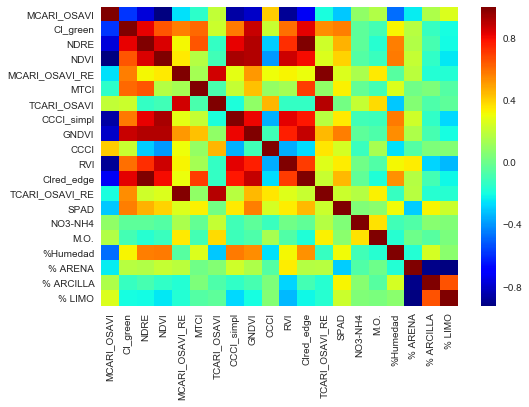

In [38]:
sns.heatmap(X[numeric_variables].corr(), cmap="jet")

In [41]:
import statsmodels.api as sm
est = sm.OLS(y, X[numeric_variables]).fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                N_TOTAL   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     12.00
Date:                Sun, 03 Feb 2019   Prob (F-statistic):           1.41e-16
Time:                        11:10:05   Log-Likelihood:                -2.5185
No. Observations:                 103   AIC:                             45.04
Df Residuals:                      83   BIC:                             97.73
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
MCARI_OSAVI       -0.7616      1.346     -0.

# linear regression

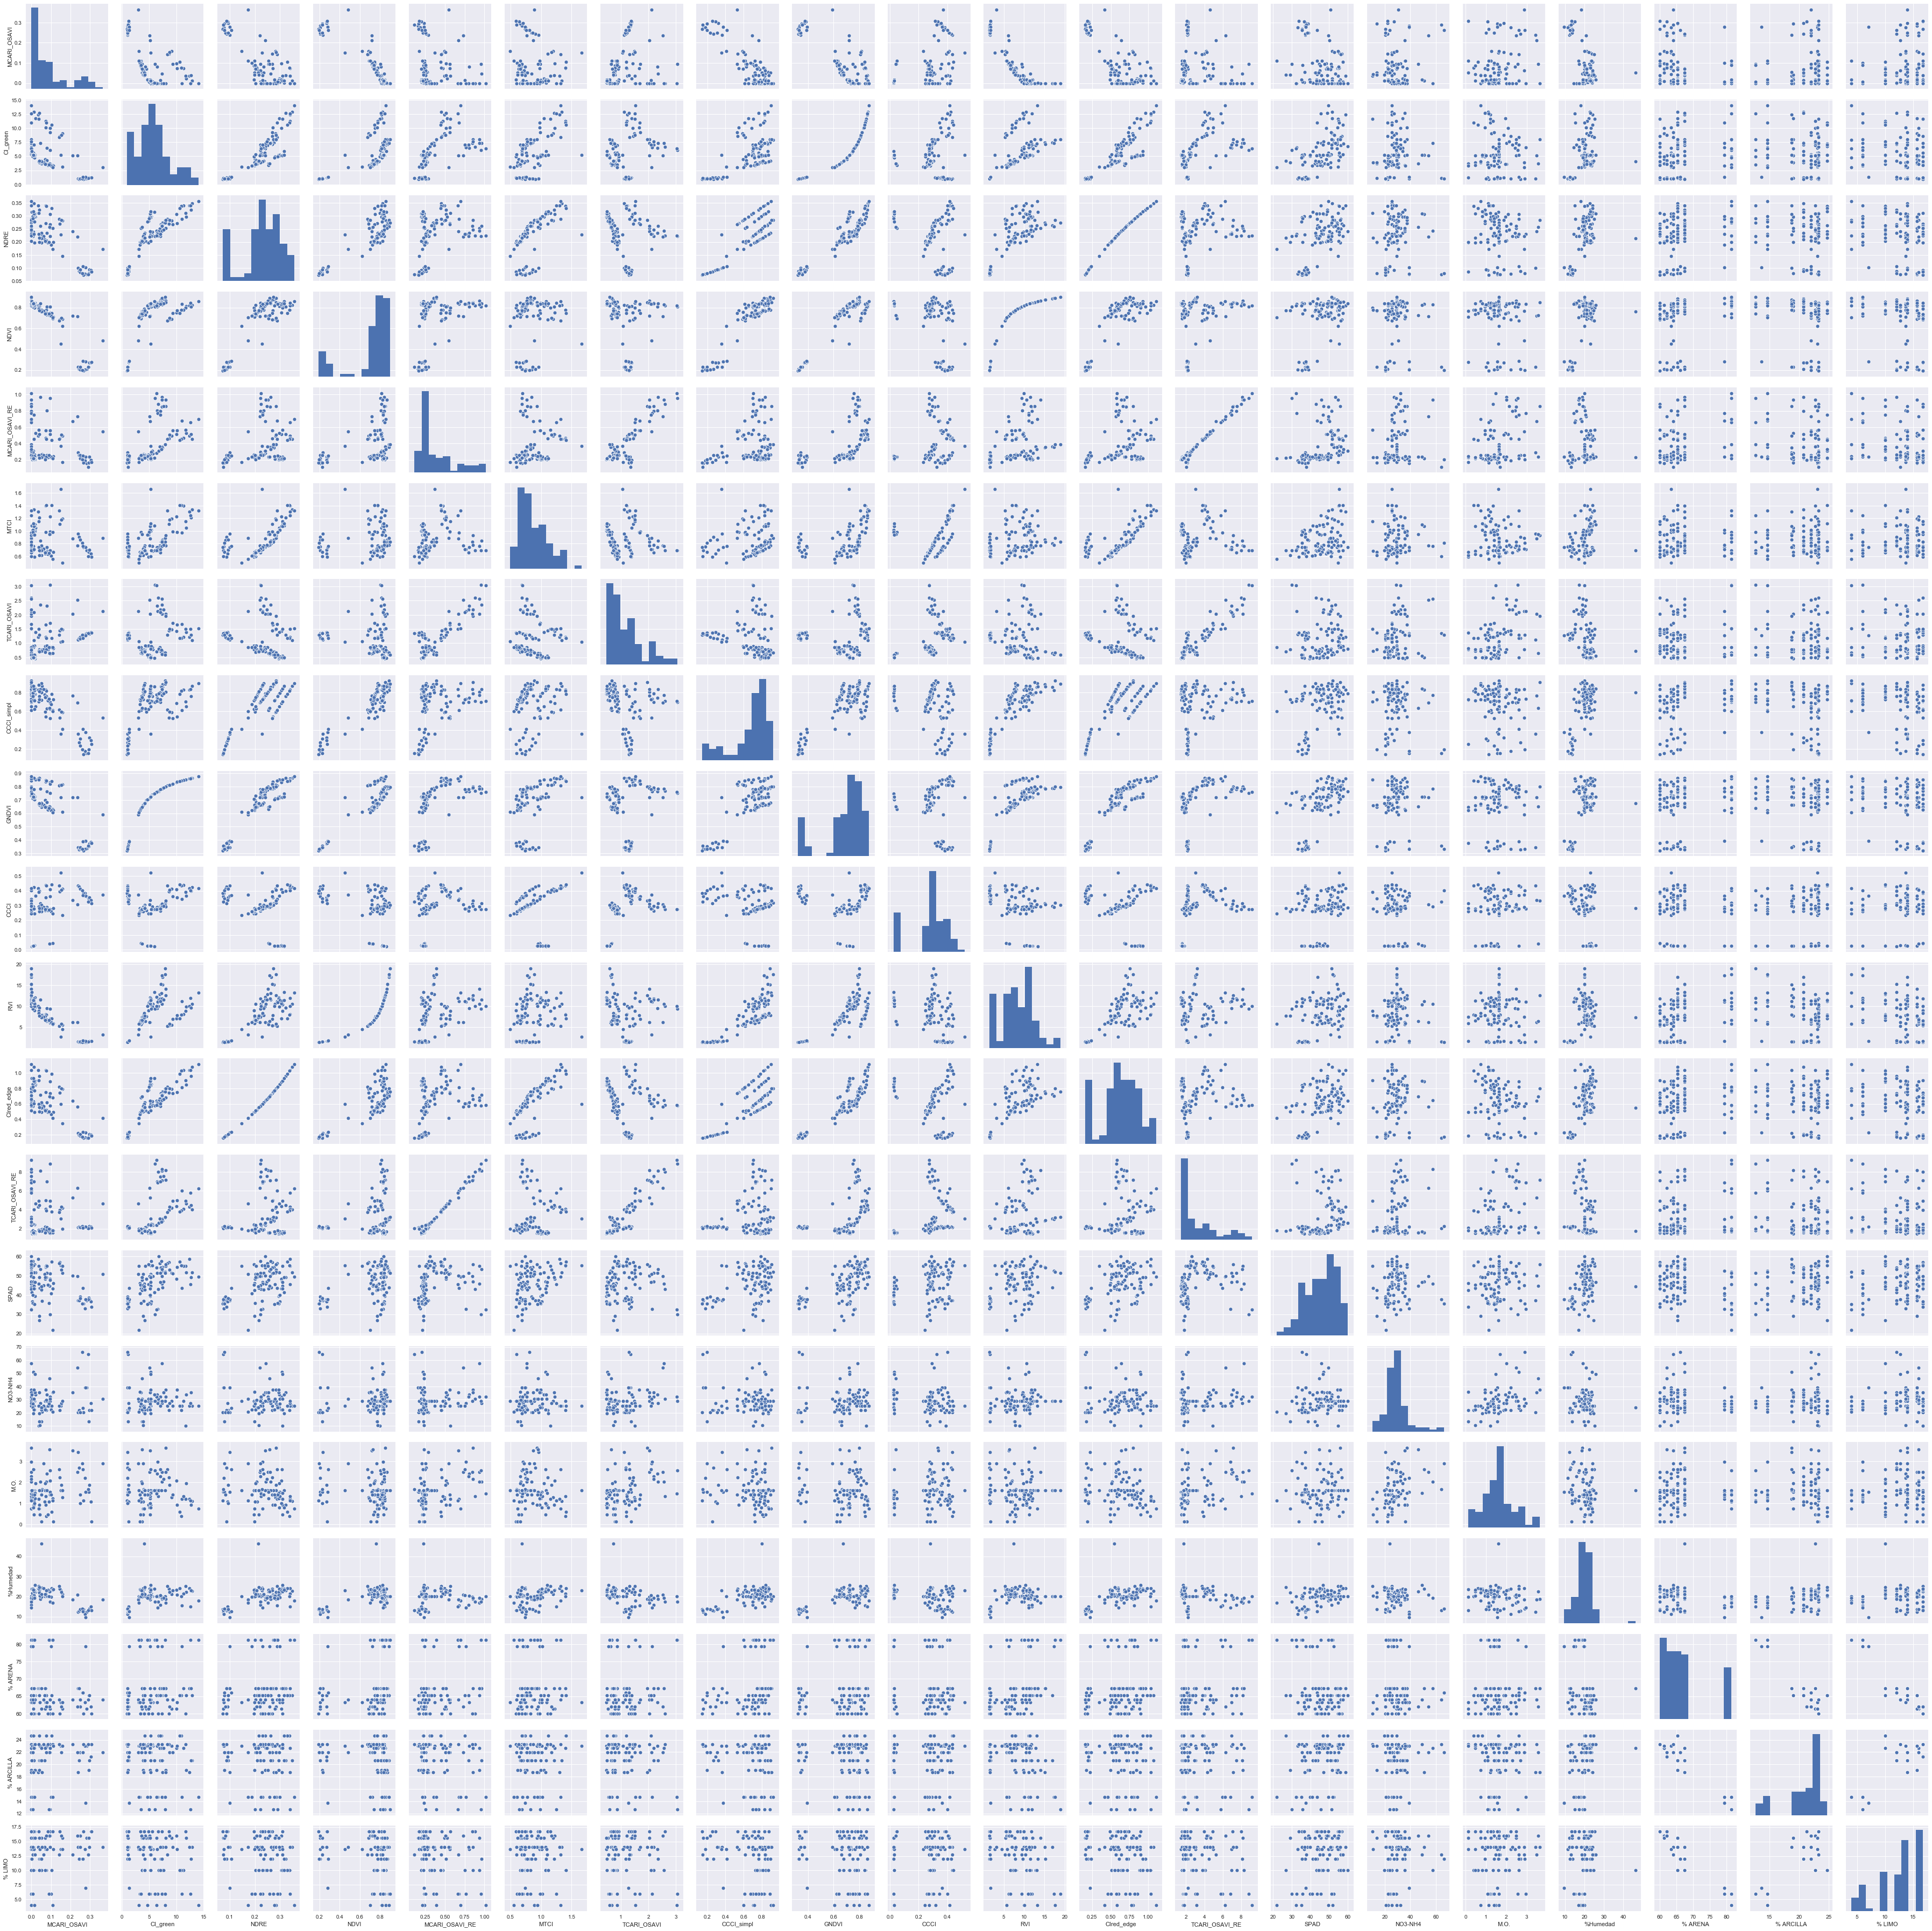

In [42]:
sns.pairplot(X[numeric_variables])

Coefficients: 
 [-9.28840615e-01  2.56302430e-02 -2.15277967e+01 -9.51060044e+00
  3.82099383e+00 -7.82101382e-01 -1.24471881e-01  2.56409362e+00
  8.13773841e+00 -4.33459150e+00  3.56905265e-02  4.50786828e+00
 -3.11275673e-01 -9.17960522e-03  3.88930089e-03  3.79981509e-02
 -3.51941390e-03 -1.02024254e+13 -1.02024254e+13 -1.02024254e+13]


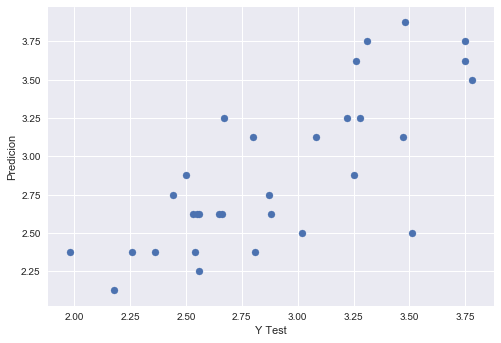

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[numeric_variables], y, test_size=0.3, random_state=101)

from sklearn.linear_model import LinearRegression

# crear la estancia del modelo
model = LinearRegression()

# ajustar el modelo a la información de entrenamiento
model.fit(X_train,y_train)

# coeficientes del modelo
print('Coefficients: \n', model.coef_)

predictions = model.predict( X_test)

# crear una gráfica con los valores sinteticos vs reales
plt.scatter(y_test,predictions)
plt.xlabel('Y Test',)
plt.ylabel('Predicion')
plt.show()

In [44]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test,predictions)

print(r_value**2)

0.5938781005509562


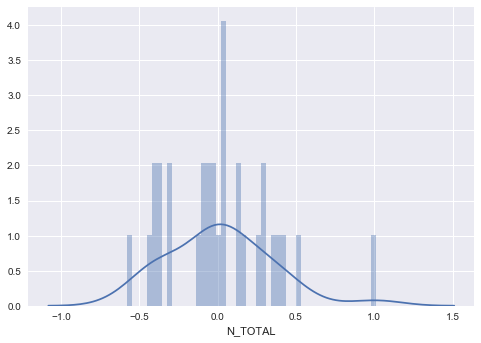

In [45]:
sns.distplot((y_test-predictions),bins=50);

In [48]:
coeffecients = pd.DataFrame(model.coef_,X[numeric_variables].columns)
coeffecients.columns = ['Coeficiente']
print(coeffecients)

                 Coeficiente
MCARI_OSAVI    -9.288406e-01
CI_green        2.563024e-02
NDRE           -2.152780e+01
NDVI           -9.510600e+00
MCARI_OSAVI_RE  3.820994e+00
MTCI           -7.821014e-01
TCARI_OSAVI    -1.244719e-01
CCCI_simpl      2.564094e+00
GNDVI           8.137738e+00
CCCI           -4.334591e+00
RVI             3.569053e-02
CIred_edge      4.507868e+00
TCARI_OSAVI_RE -3.112757e-01
SPAD           -9.179605e-03
NO3-NH4         3.889301e-03
M.O.            3.799815e-02
%Humedad       -3.519414e-03
% ARENA        -1.020243e+13
% ARCILLA      -1.020243e+13
% LIMO         -1.020243e+13
